# Making geologic cross sections from well logs

In [1]:
! pip install lasio

In [2]:
# let's import some packages we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import lasio
from textwrap import wrap  # for making pretty well names

%matplotlib inline

### Where did this data come from?
The cell below reads in the LAS file names using glob, and then reads in some fake tops I made up for the cross section. These are close to the top of the Niobrara Formation in the Denver Basin of southeast Wyoming. Well log LAS files are from the [WOGCC](http://pipeline.wyo.gov/legacywogcce.cfm) and tops are eyeballed by me and are probably way off.

In [3]:
wells = []
for name in glob.glob("logs/2014/*.las"):
    wells.append(name)

Now let's create a figure and read in well log. We then plot each log by subsea depth so we can see a structural cross section

In [35]:
def get_depth(well_log):
    try:
        return well_log["DEPT"]
    except:
        return well_log["DEPTH"]

def get_gamma(well_log):
    try:
        return well_log["GR"]
    except:
        try:
            return well_log["GRGC"]
        except:
            try:
                return well_log["GAMMA"]
            except:
                return well_log["GAMMA:1"]

def get_well(well_log):
    try:
        return well_log.well["WELL"]
    except:
        return well_log.well["WELL:1"]

In [36]:
len(wells)

3231

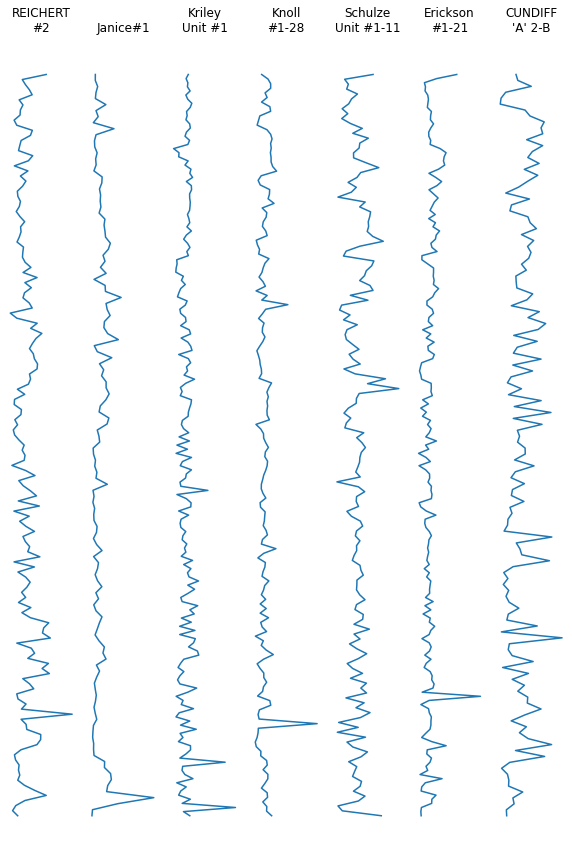

In [37]:
fig = plt.figure(figsize=(10, 15))  # set our figure size

for i, j in enumerate(range(21, 28)):  # we read in the 7 logs
    well_log = lasio.read(wells[j])  # this reads in the log
    ax = fig.add_subplot(
        171 + i
    )  # creates a subplot that the curve will be plotted in
    try:
        ax.plot(
            get_gamma(well_log)[::50],
            get_depth(well_log)[::50],
        )
    except Exception as e:
        print(e)
        print()
        pass
    # this does the plotting, we plot gamma ray as a function of depth. note we subtract the kelly bushing elevation (EKB) to get subsea depth
    # we also downsample the logs so they plot faster
    ax.invert_yaxis()
    # flip the axis so downhole is down in the figure
    ax.axis("off")
    # this gets rid of the axis so they look clean
    ax.set_title("\n".join(wrap(get_well(well_log).value, 10)))
    # and let's go ahead and add titles to each log for fun

That's a nice little cross section above, but can we make it better looking? More geologic styling to the gamma-ray curves is possible. Let's investigate this possibility. We will take our plot from above, and we're going to color between the curve and the right hand side. For a full breakdown look at the [coloring well logs notebook](https://github.com/jessepisel/5minutesofpython/blob/master/Well%20log%20plots/gamma%20ray%20colors.ipynb). One last thing we want to do is remove the whitespace between the logs so it looks better and we do that in the last line of the cell

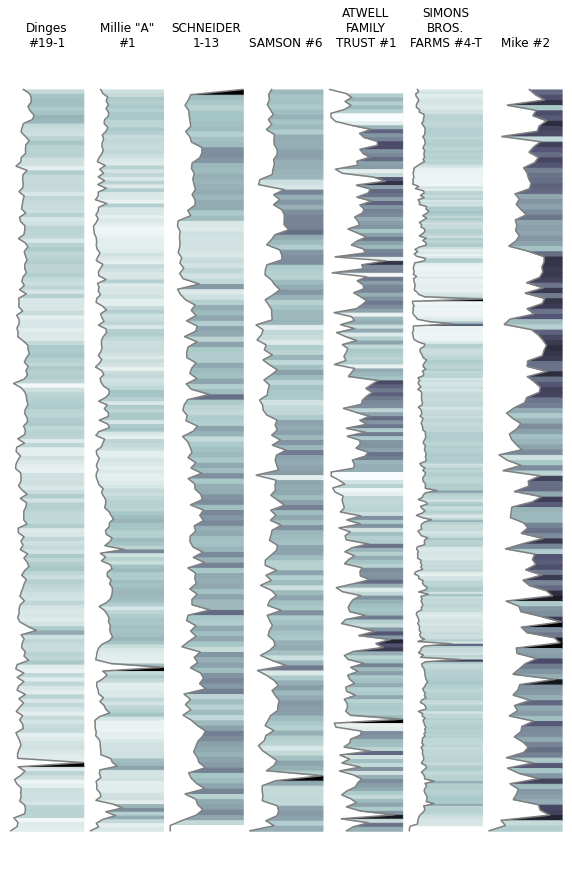

In [7]:
import matplotlib as mpl  # for making a colormap

cmap = mpl.cm.bone_r  # select our color map

fig = plt.figure(figsize=(10, 15))  # set our figure size


for i, j in enumerate(range(14, 21)):  # we read in the 7 logs
    well_log = lasio.read(wells[j])  # this reads in the log
    try:
        x = get_gamma(well_log)[::50]  # assign the GR values to x
        x[np.isnan(x)] = 0
        y = get_depth(well_log)[::50] #% assign the depth values to y
        z = (
             x
        )  # create a third variable for the colors, you could have fun and make this another curve as well
    except Exception as E:
        print(wells[i])
        print(E)
    normalize = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

    ax = fig.add_subplot(
        171 + i
    )  # creates a subplot that the curve will be plotted in
    ax.plot(x, y, color="gray")
    # this does the plotting, we plot gamma ray as a function of depth. note we subtract the kelly bushing elevation (EKB) to get subsea depth
    ax.invert_yaxis()
    # flip the axis so downhole is down in the figure

    for k in range(x.size - 1):
        plt.fill_betweenx(
            [y[k], y[k + 1]],
            [x[k], x[k + 1]],
            x2=z.max(),
            color=cmap(normalize(z[k])),
        )
    # let's plot the fake tops from the csv file as a horizontal line, don't forget to subtract the KB elevation for subsea depth
    ax.axis("off")
    # this gets rid of the axis so they look clean
    ax.set_title("\n".join(wrap(well_log.well["WELL"].value, 10)))
    # and let's go ahead and add titles to each log for fun
plt.subplots_adjust(wspace=0, hspace=0)

This notebook is licensed as CC-BY, use and share to your hearts content.

What else is in the well_log dataframe??

In [8]:
example_log = lasio.read(wells[0])
wells[0]

'logs/2014/1044839666.las'

Lets drop NaN's to see what is concistently there


In [9]:
example_df = example_log.df()
example_df

,BVTX,AVTX,RXORT,CILD,RLL3,SP,RILD,RILM,DCAL,RHOB,RHOC,DPOR,CNLS,GR,DGA,MCAL,MI,MN
DEPT,,,,,,,,,,,,,,,,,,
-1.0,0.0,0.0,NaN,NaN,100000.0,NaN,NaN,NaN,2.8636,-1.5648,-3.1316,249.9881,-4.9571,352.6158,NaN,NaN,NaN,NaN
-0.5,0.0,0.0,-28.7733,0.0000,50000.0,-333.0000,50000.0000,-499.6250,1.4312,-0.6938,-1.4650,119.8116,-2.4975,146.9875,NaN,NaN,NaN,NaN
0.0,0.0,0.0,-28.7733,0.0000,50000.0,-333.0000,50000.0000,-499.6250,1.4312,-0.6938,-1.4650,119.8116,-2.4975,146.9875,NaN,NaN,NaN,NaN
0.5,0.0,0.0,-392.5096,66.8215,100000.0,-999.0000,14.9652,NaN,2.8613,-0.7261,-2.3105,200.9407,-4.8093,253.7774,NaN,NaN,NaN,NaN
1.0,0.0,0.0,-403.8156,117.4983,100000.0,-999.0000,8.5108,NaN,2.8611,-0.2107,-1.7720,170.7992,-4.4559,235.1165,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723.5,0.0,0.0,0.0000,0.0000,NaN,-50.2496,100000.0000,7.3005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.9624,2.2530,3.7520
4724.0,0.0,0.0,0.0000,0.0000,NaN,-50.7174,100000.0000,7.5690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.9617,2.2485,3.7498
4724.5,0.0,0.0,0.0000,0.0000,NaN,-51.2160,100000.0000,8.1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.9583,2.2406,3.7426


In [10]:
well_log.df().dropna()["GR"]

DEPT
2895.0     47.3903
2895.5     59.7958
2896.0     80.0829
2896.5     99.0036
2897.0    114.2536
            ...   
3720.5     26.1402
3721.0     24.6317
3721.5     24.4681
3722.0     25.1339
3722.5     26.9347
Name: GR, Length: 1656, dtype: float64

In [11]:
well_log.df()["GR"]

DEPT
195.0     68.4189
195.5     70.3969
196.0     69.9531
196.5     68.0556
197.0     66.9933
           ...   
3766.5        NaN
3767.0        NaN
3767.5        NaN
3768.0        NaN
3768.5        NaN
Name: GR, Length: 7148, dtype: float64

In [38]:
def plot_well(file_name):
    fig = plt.figure(figsize=(2,10))
    well_log = lasio.read(file_name)  # this reads in the log
    try:
        x = get_gamma(well_log)[::50]  # assign the GR values to x
        x[np.isnan(x)] = 0
        y = get_depth(well_log)[::50] #% assign the depth values to y
        z = (
            x
        )  # create a third variable for the colors, you could have fun and make this another curve as well
    except Exception as E:
        print(file_name)
        print(E)
        plt.close(fig)
        return
    normalize = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

    plt.plot(x, y, color="gray")
    ax = plt.gca()
    # this does the plotting, we plot gamma ray as a function of depth. note we subtract the kelly bushing elevation (EKB) to get subsea depth
    ax.invert_yaxis()
    # flip the axis so downhole is down in the figure

    for j in range(x.size - 1):
        plt.fill_betweenx(
            [y[j], y[j + 1]],
            [x[j], x[j + 1]],
            x2=z.max(),
            color=cmap(normalize(z[j])),
        )
    # let's plot the fake tops from the csv file as a horizontal line, don't forget to subtract the KB elevation for subsea depth
    ax.axis("off")
    # this gets rid of the axis so they look clean
    ax.set_title("\n".join(wrap(f'{get_well(well_log).value}', width=10)))
    # and let's go ahead and add titles to each log for fun
    well_name = get_well(well_log).value
    if type(well_name) == type([]):
        well_name = "".join(well_name)
    else:
        well_name = str(well_name)
    plt.savefig("well_figs/" + well_name.replace('/', '') + ".png", transparent=True)
    plt.close(fig)

logs/2014/1044761857.las
"GAMMA:1 not found in curves (['DEPT', '--:1', '--:2', '--:3'])"
logs/2014/1044913805.las
"GAMMA:1 not found in curves (['DEPT', 'PE', 'NPHI', 'DPHI'])"
logs/2014/1044913726.las
"GAMMA:1 not found in curves (['DEPT', 'NPHI', 'DPHI', 'PE'])"
logs/2014/1044839333.las
"GAMMA:1 not found in curves (['DEPT', 'ROPA', 'PGXR-T', 'PGTVD', 'PGVS'])"


KeyboardInterrupt: 

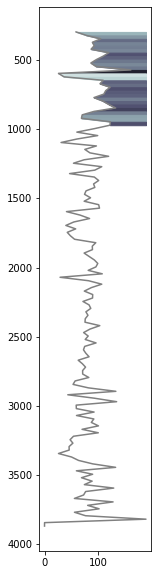

In [39]:
for i, well in enumerate(wells):
    plot_well(well)

In [198]:
def get_county(well_log):
    try:
        return well_log.well["CNTY"]
    except:
        return f"NA"

In [102]:
well_logs = []
for file in wells:
    well_logs.append(lasio.read(file))

ValueError: Cannot reshape ~A data size (697,) into 8 columns

In [194]:
stop = len(well_logs)
for i in range(stop+2, len(wells)):
    file = wells[i]
    well_logs.append(lasio.read(file))

In [195]:
len(well_logs)

3229

In [199]:
counties = []
for well_log in well_logs:
    counties.append(get_county(well_log))

In [217]:
len(counties)

3229

In [201]:
for i, county in enumerate(counties):
    if type(county) != type(""):
        counties[i] = county.value
    
    counties[i] = counties[i].upper()

In [210]:
kwargs = dict(County=counties)

final_df = pd.DataFrame(kwargs)

In [285]:
final_df

,County
0,LOGAN
1,NESS
2,ELLIS
3,NESS
4,HODGEMAN
...,...
3224,GOVE
3225,NEMAHA
3226,ANDERSON
3227,GRAHAM


We found a bunch of typos...

In [346]:
corrections = {"HARPER CO": "HARPER", "SUMMER": "SUMNER", "SEDOWICK": "SEDGWICK", "ELLS": "ELLIS", "NESS CO.": "NESS", '': "NA"}
for key, value in corrections.items():
    final_df.loc[final_df["County"] == key] = value

In [347]:
freq_count = final_df["County"].value_counts()
freq_df = pd.DataFrame({"County": freq_count.keys(), "Frequency": freq_count.values})
freq_df = freq_df.sort_values(by="Frequency", ascending=False)
freq_df = freq_df.reset_index(drop=True)
freq_df

,County,Frequency
0,ELLIS,234
1,NESS,215
2,ANDERSON,199
3,BARBER,167
4,ROOKS,126
...,...,...
79,POTTAWATOMIE,1
80,RILEY,1
81,CHEROKEE,1
82,ELK,1


In [348]:
freq_df["Percent"] = freq_df['Frequency'] /freq_df["Frequency"].sum() * 100
freq_df

,County,Frequency,Percent
0,ELLIS,234,7.246826
1,NESS,215,6.658408
2,ANDERSON,199,6.162899
3,BARBER,167,5.171880
4,ROOKS,126,3.902137
...,...,...,...
79,POTTAWATOMIE,1,0.030969
80,RILEY,1,0.030969
81,CHEROKEE,1,0.030969
82,ELK,1,0.030969


<BarContainer object of 84 artists>

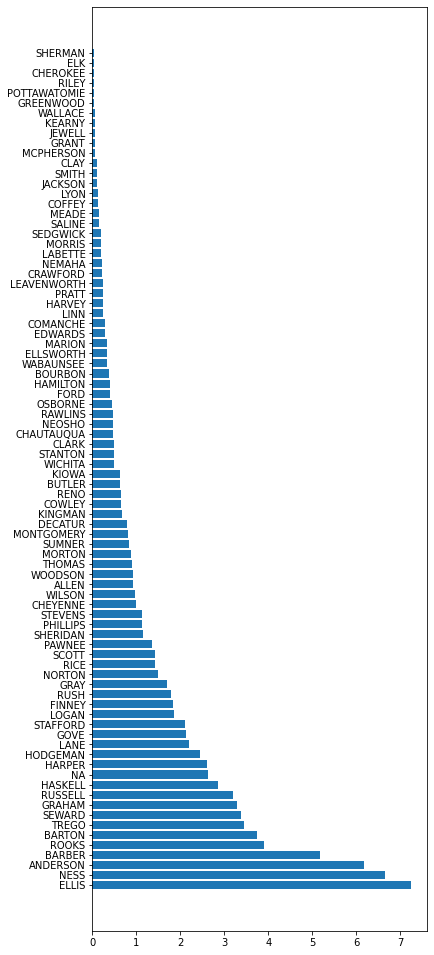

In [349]:
fig = plt.figure(figsize=(6,17))
plt.yticks(range(len(freq_df)), freq_df["County"])
plt.barh(range(len(freq_df)), freq_df["Percent"])

In [350]:
freq_df[freq_df["County"] == "NA"]

,County,Frequency,Percent
11,NA,85,2.632394


In [351]:
freq_df.head(10)

,County,Frequency,Percent
0,ELLIS,234,7.246826
1,NESS,215,6.658408
2,ANDERSON,199,6.162899
3,BARBER,167,5.171880
4,ROOKS,126,3.902137
5,BARTON,121,3.747290
6,TREGO,111,3.437597
7,SEWARD,109,3.375658
8,GRAHAM,106,3.282750
9,RUSSELL,103,3.189842


<AxesSubplot:>

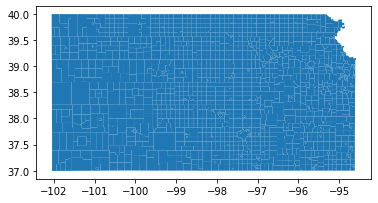

In [363]:
import geopandas as gpd
kansas_map = gpd.read_file("kansas.zip")
kansas_map.plot()

We want to find the county codes for each

In [354]:
fpis = pd.read_csv("fips.csv")
fpis

,fips,name,state
0,0,UNITED STATES,NaN
1,1000,ALABAMA,NaN
2,1001,Autauga County,AL
3,1003,Baldwin County,AL
4,1005,Barbour County,AL
...,...,...,...
3190,56037,Sweetwater County,WY
3191,56039,Teton County,WY
3192,56041,Uinta County,WY
3193,56043,Washakie County,WY


In [355]:
freq_df

,County,Frequency,Percent
0,ELLIS,234,7.246826
1,NESS,215,6.658408
2,ANDERSON,199,6.162899
3,BARBER,167,5.171880
4,ROOKS,126,3.902137
...,...,...,...
79,POTTAWATOMIE,1,0.030969
80,RILEY,1,0.030969
81,CHEROKEE,1,0.030969
82,ELK,1,0.030969


In [358]:
for county in freq_df["County"]:
    name = county.capitalize() + " County"
    if name == "Mcpherson County":
        name = "McPherson County"
    q1 = fpis[fpis["name"] == name]
    try:
        freq_df["COUNTYFP"] = str(q1[q1["state"] == "KS"]["fips"].iloc[0])[2:]
    except:
        print("None - " + county)

None - NA


Now we can join the two together

<AxesSubplot:>

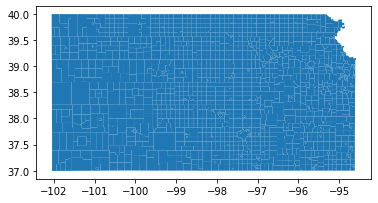

In [384]:
kansas_map.plot()

In [386]:
len(kansas_map)

1531

<AxesSubplot:>

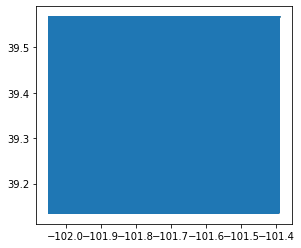

In [383]:
density_map = kansas_map.merge(freq_df.drop(["County"], axis=1, ), on = "COUNTYFP")
density_map[density_map["County"] == "ELLIS"]